# Stage Talens Science des données : séance 2

# Challenge MNIST par caractéristiques moyennes

## Notebook Python

In [1]:
# Importation des données 
from utilitaires_chargement_ import *

## Rappel sur les image numérique en Python

Affichons une image `x` de taille $28 \times 28$ que nous avons importée. Exécutez pour cela la cellule suivante.

In [ ]:
# Dans cette cellule, affiche l'image x


Accédons à la valeur du pixel (14,14) par la commande `x[14,14]` et affichons cette valeur avec la fonction `print()`. Exécutez pour cela la cellule suivante.

In [15]:
# Dans cette cellule, afficher le pixel (14, 14)


_Dit à l'oral (à mettre dans la fiche prof, partie notebook) :_ On vérifie que la valeur du pixel (14,14) est 0 et que cela correspond bien à un pixel noir sur l'image `x`.

<br><br><br>

***
***

<br><br><br>

# Challenge MNIST-4 : classifier les chiffres 0, 1, 4, 8

La base de données MNIST-4 contient des images de 0, de 1, de 4 et de 8 de taille $28 \times 28$. 

* Images d'entraînement : liste `x_train_4`.
* Images de test : liste `x_test_4`. 



* Chiffres $y \in \{0,1, 4, 8\}$ associés aux images de `x_train_4` : `y_train_4`

## 1.Visualisation d'images d'entraînement 

* `x_train_par_population[0]` est une liste contenant toutes les images de 0.
* `x_train_par_population[1]` est une liste contenant toutes les images de 1.
* `x_train_par_population[2]` est une liste contenant toutes les images de 4.
* `x_train_par_population[3]` est une liste contenant toutes les images de 8.

In [16]:
# Dans cette cellule, afficher la huitième image au sein de la population de chiffres 4


Exécutez la cellule ci-dessous afin d'afficher les dix premières images au sein de chaque population.

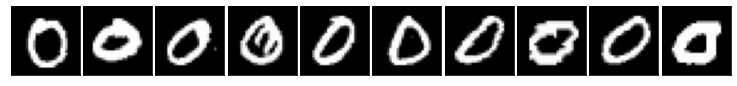

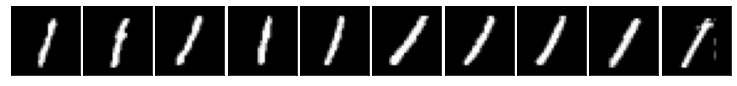

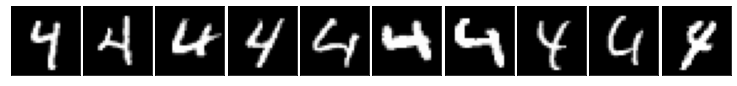

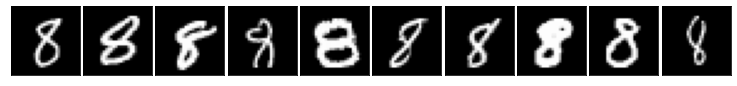

In [2]:
# Affichage des dix premières images de 0
affichage_dix(x_train_par_population[0])

# Affichage des dix premières images de 1
affichage_dix(x_train_par_population[1])

# Affichage des dix premières images de 4
affichage_dix(x_train_par_population[2])

# Affichage des dix premières images de 8
affichage_dix(x_train_par_population[3])

<br><br><br>

***
***

<br><br><br>

## 2. Trouver deux caractéristiques discriminantes au lieu d'une seule

**Benchmark :** Proposition de deux caractéristiques utilisées comme référence 

In [3]:
# Fonction proposée, utilisée comme référence

def deux_caracteristiques(x):
    # Initialisation des deux caractéristiques à 0 : somme[0] représentant la valeur moyenne des pixels sur 
    # la moitié supérieure de l'image, et somme[1] sur la moitié inférieure
    somme = [0, 0] 
    for i in range(14):  # on ne parcourt que les lignes de la moitié supérieure
        for j in range(28): 
            somme[0] = somme[0] + x[i,j]   # rajout de la valeur du pixel (i,j) à la somme
            somme[1] = somme[1] + x[i+14,j]  # décalage de 14 pour parcourir les lignes de la moitié inférieure
    # Normalisation
    somme[0] = somme[0] / (14*28)
    somme[1] = somme[1] / (14*28)
    return somme

<b><font color=red> Vous définirez ci-dessous vos deux propres caractéristiques en modifiant la cellule suivante</font></b>.

In [ ]:
def deux_caracteristiques(x):
    
    ...
    
    c1 = ...
    c2 = ...
    
    return [c1, c2] # Renvoit deux caractéristiques sous la forme d'une liste à deux éléments [c1, c2]

On calcule ces deux caractéristiques sur toutes les images de `x_train_4`, et on stocke les résultats dans une liste `c_train`. 

Exécutez la cellule suivante qui calcule la liste `c_train`.

In [4]:
# On commence par définir et initialiser la liste c_train (vide au début)
c_train = []

# On la remplit à l'aide d'une boucle for :
for x in x_train_4:
    c_train.append(deux_caracteristiques(x))

### Visualisation dans le plan des caractéristiques des différentes populations

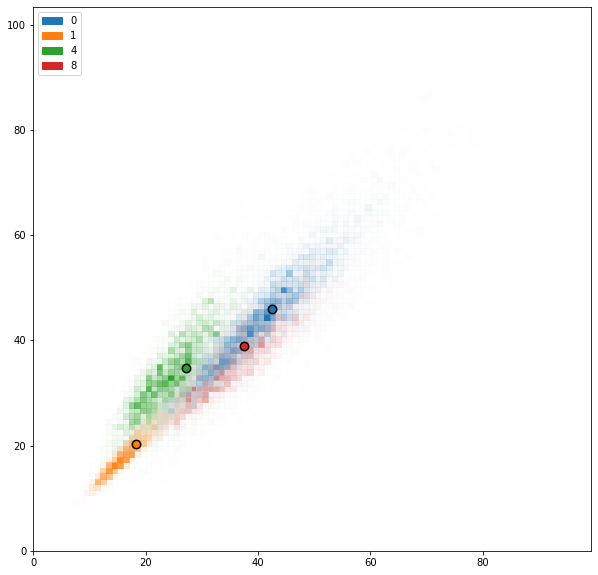

In [5]:
visualiser_histogrammes_2d_mnist_4(c_train)

<br><br><br>

***
***

<br><br><br>

## 3. Calcul de l'erreur (et donc du score)

### Erreur sur l'ensemble d'entraînement

On donne la fonction `classification_2d_MNIST4(c, theta)` qui prend en entrée la caractéristique $c(x)$ d'une image et les paramètres `theta` (liste des paramètres), et qui donne la classe de $x$.

On donne aussi la fonction `moyenne` qui calcule la moyenne d'une liste, et la fonction `par_population`qui répartit une liste en 4 classe en fonction du chiffre associée à l'image : 

In [6]:
c_train_par_population = par_population(c_train)

* Ex : `c_train_par_population[0]` est une liste contenant les caractéristiques de toutes les images de 0.

<b><font color=red> Écire un code qui donne la liste des paramètres `theta`</font></b> :

In [13]:
# Paramètre theta = [theta_0, theta_1, ...]

theta_0 = ...   
theta_1 = ...
theta_4 = ...
theta_8 = ...

theta = [theta_0, theta_1, theta_4, theta_8]

On stocke comme précédemment nos estimations de chiffres des images d'entraînement dans une liste `y_est_train`. On applique pour cela la fonction `classification_2d_MNIST4()`.

Exécutez la cellule suivante qui calcule `y_est_train`.

In [9]:
# On commence par définir et initialiser la liste y_est_train (vide au début)
y_est_train = []

# On remplit y_est_train à l'aide d'une boucle :
for c in c_train:
    y_est_train.append(classification_2d_MNIST4(c, theta))

Exécutez la cellule suivante afin de calculer le taux d'erreur de notre algorithme sur toute les images d'entraînement, à l'aide de la fonction `score()` précédemment définie.

In [10]:
# Affichage du score
print("Score =", f"{100*score(y_est_train, y_train_4):.2f}%")

Score = 43.07%


<b><font color=red> Qu'en concluez-vous ? </font></b>

<br><br><br>

***
***

<br><br><br>

### Erreur sur l'ensemble de test

On applique maintenant l'algorithme de classification précédent aux images de test `x_test_4`. On commence comme pour les images d'entraînement par calculer leurs caractéristiques et les stocker dans une liste `c_test`. 

Exécutez la cellule suivante qui calcule `c_test`.  

In [18]:
# On commence par définir et initialiser la liste c_test (vide au début)
c_test = []

# On la remplit à l'aide d'une boucle for :
for x in x_test_4:
    c_test.append(deux_caracteristiques(x))

A l'aide de notre algorithme, on effectue des estimations des chiffres de nos images de test, que l'on stocke dans une liste `y_est_test`. 

Exécutez la cellule suivante qui calcule `y_est_test`.

In [16]:
# On commence par définir cette liste (vide au début)
y_est_test = []

# On remplit y_est_test à l'aide d'une boucle :
for c in c_test:
    y_est_test.append(classification_2d_MNIST4(c, theta))

Sauvez et téléchargez vos estimations `y_est_test` sur les images de test dans un fichier 'y_est_test.csv' en exécutant la cellule suivante.

In [17]:
sauver_et_telecharger_mnist_4(y_est_test, 'y_est_test.csv')

NameError: name 'basthon' is not defined

<b><font color=red>Soumettez ce fichier .csv sur la plateforme Challenge Data</font></b> afin d'obtenir votre erreur de test en cliquant sur **[ce lien](https://challengedata.ens.fr/participants/challenges/117/)** (n'oubliez pas au préalable d'être bien connecté).

Quelle est votre erreur de test ?